Мировой рейтинг университетов ([kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings))

In [91]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Чтение данных. Какие русские университеты входят в список?

In [106]:
data = pd.read_csv('cwurData.csv', header=0)
print(data.shape)
print(data[['institution', 'year']][data['country'] == 'Russia'])

(2200, 14)
                                     institution  year
189            Lomonosov Moscow State University  2013
247            Lomonosov Moscow State University  2014
484            Saint Petersburg State University  2014
1115                Novosibirsk State University  2014
1258           Lomonosov Moscow State University  2015
1449  Moscow Institute of Physics and Technology  2015
1605           Saint Petersburg State University  2015
1954  National Research Nuclear University MEPhI  2015
2184                Novosibirsk State University  2015


In [93]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Данные в столбцах представляют собой рейтинг в данной категории. Поэтому, чем меньше значение, тем лучше.

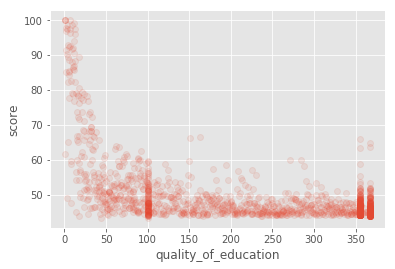

In [94]:
plt.plot(data['quality_of_education'], data['score'], 'o', alpha=0.1)
plt.xlabel('quality_of_education')
plt.ylabel('score')
pass

В таблице присутствуют данные за 2012, 2013, 2014 и 2015 года. Возьмем данные только за 2015 год. Как видно, пропущенных значений нет.

In [107]:
data = data.loc[data['year'] == 2015]
print(data.count())

world_rank              1000
institution             1000
country                 1000
national_rank           1000
quality_of_education    1000
alumni_employment       1000
quality_of_faculty      1000
publications            1000
influence               1000
citations               1000
broad_impact            1000
patents                 1000
score                   1000
year                    1000
dtype: int64


Некоторые столбцы нас не интересуют, удалим их. Столбец "world_rank" нас не интересует, так как присутствует столбец "score", из которого и получается ранг.

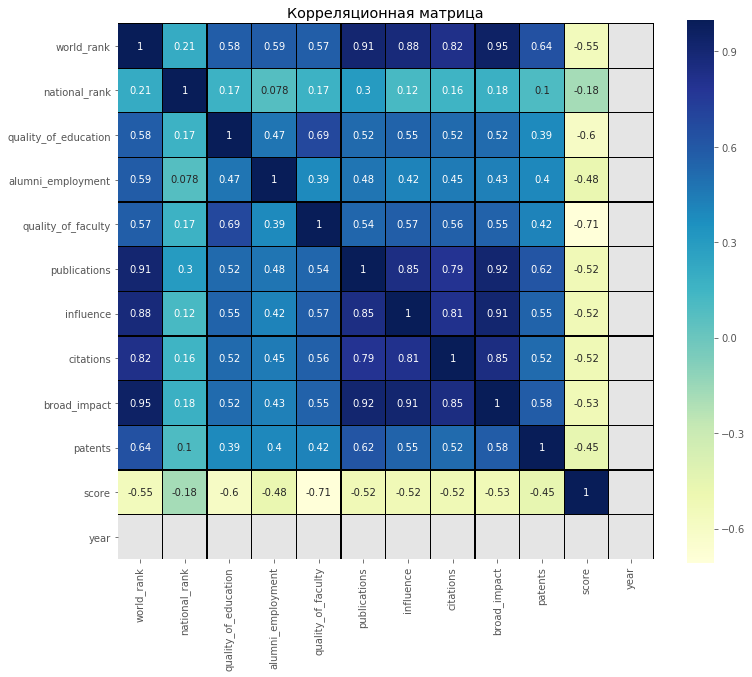

In [96]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(data.corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [108]:
data.drop(['institution', 'world_rank', 'year', 'country'], axis=1, inplace=True)

In [98]:
data.shape

(1000, 10)

In [109]:
X = data.drop(['score'], axis=1)
y = data['score']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(1000, 9) (1000,)


Распределим столбцы на категориальные и числовые

In [110]:
categorical_columns = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns = [c for c in X.columns if X[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']


Проверим есть ли в категориальных данных бинарные. Бинарных данных нет.

In [101]:
data_describe = X.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

ValueError: No objects to concatenate

Рассмотрим столбец "Страна" и векторизуем его

In [78]:
X['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'China', 'Taiwan', 'Russia',
       'Singapore', 'Sweden', 'Denmark', 'Germany', 'Belgium',
       'Netherlands', 'Australia', 'Norway', 'Finland', 'Italy', 'Spain',
       'Brazil', 'South Africa', 'Hong Kong', 'Ireland', 'Austria',
       'Portugal', 'New Zealand', 'Czech Republic', 'Greece', 'Thailand',
       'Mexico', 'India', 'Argentina', 'Chile', 'Poland', 'Hungary',
       'Iceland', 'Turkey', 'Malaysia', 'Slovenia', 'Estonia', 'Croatia',
       'Saudi Arabia', 'Colombia', 'Lebanon', 'Slovak Republic', 'Iran',
       'Serbia', 'Lithuania', 'Egypt', 'Bulgaria', 'Uruguay', 'Uganda',
       'Cyprus', 'United Arab Emirates', 'Puerto Rico', 'Romania'],
      dtype=object)

In [104]:
data_nonbinary = pd.get_dummies(X[nonbinary_columns])
print(data_nonbinary.columns)
print(data_nonbinary['country_Australia'].unique())

KeyError: "['country'] not in index"

Числовые данные нормализуем

In [111]:
data_numerical = X[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

Соеденим получившиеся данные

In [112]:
X = pd.DataFrame(data_numerical, dtype=int)
print(X.shape, X.columns)

(1000, 9) Index(['national_rank', 'quality_of_education', 'alumni_employment',
       'quality_of_faculty', 'publications', 'influence', 'citations',
       'broad_impact', 'patents'],
      dtype='object')


Подготовим данные для обучения

range(0, 9)


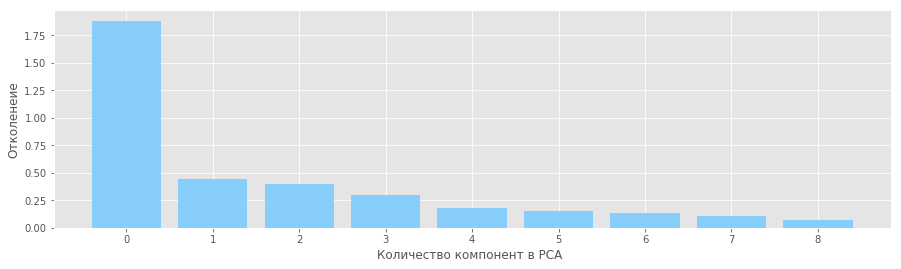

In [113]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
pca.fit(X)
features = range(pca.n_components_)
print(features)

plt.figure(figsize=(15,4))
plt.bar(features[:51], pca.explained_variance_[:51], color='lightskyblue')
plt.xlabel('Количество компонент в PCA ')
plt.ylabel('Отколенеие')
plt.xticks(features[:51])
plt.show()

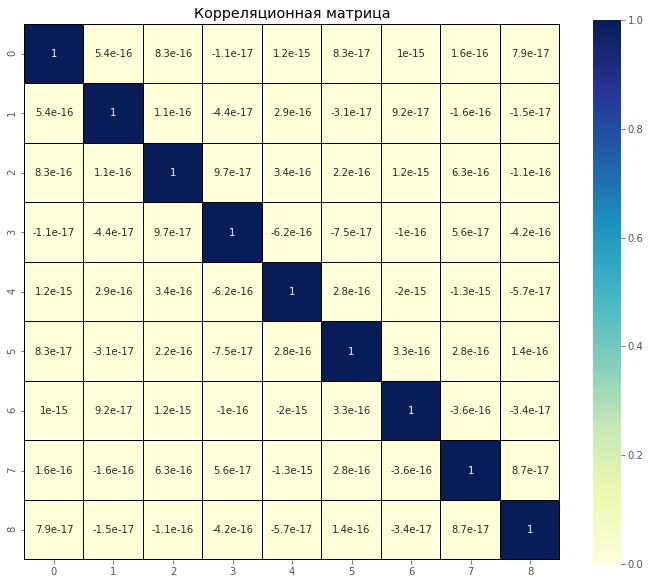

In [120]:
pca = PCA(n_components = 9, random_state=123)
X_ = pca.fit_transform(X)

f, ax = plt.subplots(figsize=(12,10))
plt.title('Корреляционная матрица')
sns.heatmap(np.corrcoef(X_.T), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

Разделим данные на обучающую и тренировучную выборки

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

200 800


C:\Users\mikhailm\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Используем классификатор "k ближайших соседей". Количество соседей = 10.

In [122]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [123]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.99 1.0


Сразу хорошие показатели: ошибка на тренировочных данных 0,08; на тестовых - 0,06. Попробуем еще снизить ошибку методом кросс валидации и перебором числа соседей.

In [124]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

# err_train = np.mean(y_train != y_train_predict)
# err_test  = np.mean(y_test  != y_test_predict)
# best_n_neighbors = grid.best_estimator_.n_neighbors

# print(err_train, err_test, best_n_neighbors)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.22661862183605064 5


In [125]:
knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.99 1.0


Результат - 5 соседей является оптимальным параметром.

## Полносвязная нейронная сеть

Пробуем полносвязную нейронную сеть с одним скрытым слоем:

In [126]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(200,), solver='adam', activation='relu', random_state=42, max_iter=1100)
mlp_model.fit(X_train, y_train)

C:\Users\mikhailm\Anaconda3\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [127]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

mlp_model.score(X_train, y_train)
print('Ошибка на обучающей выборки', 1 - mlp_model.score(X_train, y_train), 
      'Ошибка на тренировке ', 1 - mlp_model.score(X_test, y_test))

1.0 1.0
Ошибка на обучающей выборки 0.17616703586512894 Ошибка на тренировке  0.2427521682770576


Видим небольшое улучшение по сравнению с методом k ближайших соседей. Попробуем 2 скрытых слоя

In [128]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPRegressor(hidden_layer_sizes=(2,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

1.0 1.0


Видно небольшое уменьшение ошибки на тестовых данных. Но при этом разница между тренировочной и тестовой ошибками возрастает. Это указывает на переобучение. Для полноты эксперимента попробуем 3 скрытых слоя:

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(3,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Переобучение наглядно ^  Проведя эксперименты с увеличением количества скрытых слоев, я заметил, что переобучение постоянно возрастает. Попробуем перебрать некоторые значения гиперпарметра alpha.

In [ ]:
alpha_arr = np.logspace(-10, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha=alpha, hidden_layer_sizes=(200,), solver='adam', 
                              activation='relu', random_state=42, max_iter=1100)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label='train')
plt.semilogx(alpha_arr, test_err, 'r-o', label='test')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Найдем то оптимальное значение alpha:

In [ ]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

Посчитаем значения с этой alpha:

In [ ]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(1,), solver='lbfgs',
                          activation='logistic', random_state=42, max_iter=1100)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

## Random Forest

Используем классификатор "Случайный лес"

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

При количестве деревьев 10 видна ситуация переобучения. Попробуем перебрать несколько значений:

In [ ]:
trees_arr = np.arange(1, 50, 5)
test_err = []
train_err = []
oob_err = []

for tree in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=tree, oob_score=True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)